# Examen 1 - Fisica Computacional
#### Estudiante: Ignacio Vargas Cordero

### Ejercicio 1

Se tiene un oscilador armonico en dos dimensiones $(xy)$ el que la fuerza esta dado por $\vec{F}=-k\vec{r}$ y se tiene una fricción $\vec{f_{fric}}=-\gamma \vec{v}$ si $|\vec{v}|\leq1$, pero cuando $|\vec{v}|>1$ la fricción es $\vec{f_{fricc}}=-\mu v^{3/2}\hat{v}$. Si $m=1$, $\gamma=0.1$ y $\mu=0.2$, resuelva los siguientes ejercicios:

(a) Encuentre las ecuaciones de movimiento en coordenadas cartesianas y polares.

(b) Utilice el método de Runge-Kutta de 4to orden para encontrar la solución a las ecuaciones de
movimiento en el inciso anterior con condiciones iniciales $\vec{r_0}=(0,1)$ y $\vec{v_0}=(cos\theta,sin\theta)$, donde $\theta=\frac{n\pi}{6}$ con $n=0,1,2,3,...,10,11$.

(c) La energía para las distintas condiciones iniciales y detenga la simulación cuando ésta sea menor al $1\%$ de su valor inicial.

(d) Dibuje las gráficas del momento angular para los casos anteriores.

(e) Tome de manera arbitraria alguna condición inicial y dibuje el espacio fase $(p_x,x)$ y $(p_\rho,\rho)$

In [1]:
from pylab import *
%matplotlib inline

In [2]:
#Ecuacion de Movimiento en Coordenadas Cartesianas
#pos guarda la posicion y sus derivadas. pos = [x, y, x', y']
def mov_c(pos, t, m=1., gamma=0.1, mu=0.2, k=1.):
    #pos[0] y pos[1] son las posiciones
    #pos[2] y pos[3] son las velocidades
    x, y, dx, dy = pos[0], pos[1], pos[2], pos[3]
    norma_velocidad = sqrt(dx*dx + dy*dy)
    
    if norma_velocidad <= 1:
        ddx = -(k/m)*x - (gamma/m)*dx
        ddy = -(k/m)*y- (gamma/m)*dy
    else:
        ddx = -(k/m)*x - (mu/m)*sqrt(norma_velocidad)*dx
        ddy = -(k/m)*y -  (mu/m)*sqrt(norma_velocidad)*dy
    return array([dx,dy,ddx,ddy])

#Ecuacion de Movimiento en Coordenadas Polares
#pos guarda la posicion y sus derivadas. pos = [r, theta, r', theta']
def mov_p(pos, t, m=1., gamma=0.1, mu=0.2, k=1.):
    #r[0] y r[1] son las posiciones
    #r[2] y r[3] son las velocidades
    r, theta, dr, dtheta = pos[0], pos[1], pos[2], pos[3]
    norma_velocidad = sqrt(dr*dr + (r*dtheta)*(r*dtheta))
    
    if r != 0:
        if norma_velocidad <= 1:
            ddr = (dtheta*dtheta-(k/m))*r - (gamma/m)*dr
            ddtheta = -(2*(dr/r)+(gamma/m))*dtheta
        else:
            ddr = (dtheta*dtheta-(k/m))*r - (mu/m)*sqrt(norma_velocidad)*dr
            ddtheta = -(2*(dr/r)+(gamma/m)*sqrt(norma_velocidad))*dtheta
    else:
        if norma_velocidad <=1:
            ddr = (dtheta*dtheta-(k/m))*r - (gamma/m)*dr
            ddtheta = 0
        else:
            ddr = (dtheta*dtheta-(k/m))*r - (mu/m)*sqrt(norma_velocidad)*dr
            ddtheta = 0
            
    return array([dr,dtheta,ddr,ddtheta])

In [3]:
#Metodo de Runge-Kutta de 4to Orden
def rk4(ecuacion, punto_inicial, intervalo, argumentos=0, h=0.1):
    if (intervalo[1]-intervalo[0]) <= 5.*h:
        h = (intervalo[1]-intervalo[0])/10
    tiempos = arange(intervalo[0], intervalo[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    if argumentos == 0:
        for i in xrange(len(tiempos)-1):
            k1 = ecuacion(solucion[i,:], tiempos[i])
            k2 = ecuacion(solucion[i,:]+0.5*h*k1, tiempos[i]+0.5*h)
            k3 = ecuacion(solucion[i,:]+0.5*h*k2, tiempos[i]+0.5*h)
            k4 = ecuacion(solucion[i,:]+h*k3, tiempos[i]+h)
            solucion[i+1,:] = solucion[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    else:
        for i in xrange(len(tiempos)-1):
            k1 = ecuacion(solucion[i,:], tiempos[i], argumentos)
            k2 = ecuacion(solucion[i,:]+0.5*h*k1, tiempos[i]+0.5*h, argumentos)
            k3 = ecuacion(solucion[i,:]+0.5*h*k2, tiempos[i]+0.5*h, argumentos)
            k4 = ecuacion(solucion[i,:]+h*k3, tiempos[i]+h, argumentos)
            solucion[i+1,:] = solucion[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos, solucion

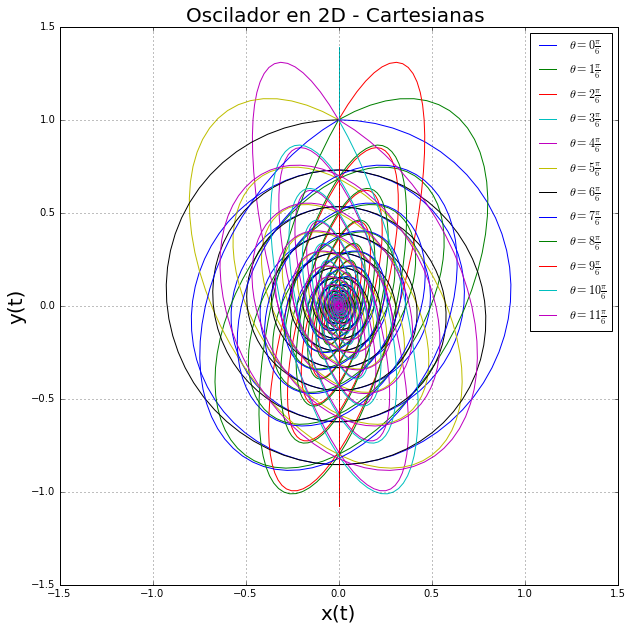

In [4]:
#Solucion a ecuacion de movimiento en cartesianas con condiciones iniciales
#r0=(0,1),
#v0=(cos(theta),sin(theta))
#donde theta=(n*pi/6) con n=0,1,2,3...10,11.
fig, ax = subplots(figsize=(10,10))
grid(True)
title(r'Oscilador en 2D - Cartesianas ',fontsize = 20),xlabel('x(t)',fontsize=20),ylabel('y(t)',fontsize = 20)
N = 100
theta = [n*pi/6. for n in range(12)]

for i in range(len(theta)):
    inicio = array([0, 1, cos(theta[i]), sin(theta[i])])
    t, sol = rk4(mov_c, inicio, [0,N])
    plot(sol[:,0], sol[:,1], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $") 
ax.set_aspect('equal', 'datalim')
ax.legend()
show()

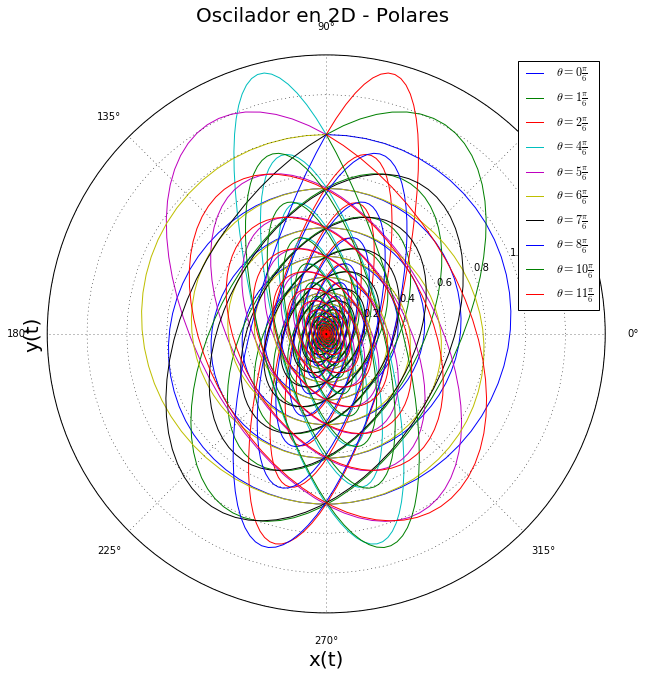

In [5]:
#Solucion a ecuacion de movimiento en polares con condiciones iniciales
#r0=(0,1),
#v0=(cos(theta),sin(theta))
#donde theta=(n*pi/6) con n=0,1,2,3...10,11.
fig = figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='polar')
grid(True)
title(r'Oscilador en 2D - Polares ',fontsize = 20),xlabel('x(t)',fontsize=20),ylabel('y(t)',fontsize = 20)
N = 100
theta = [n*pi/6. for n in range(12)]

for i in range(len(theta)):
    if abs(theta[i]%pi) != pi/2:
        inicio = array([1., pi/2., sin(theta[i]), -cos(theta[i])])
        t, sol = rk4(mov_p, inicio, [0,N])
        plot(sol[:,1], sol[:,0], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
ax.legend()
show()

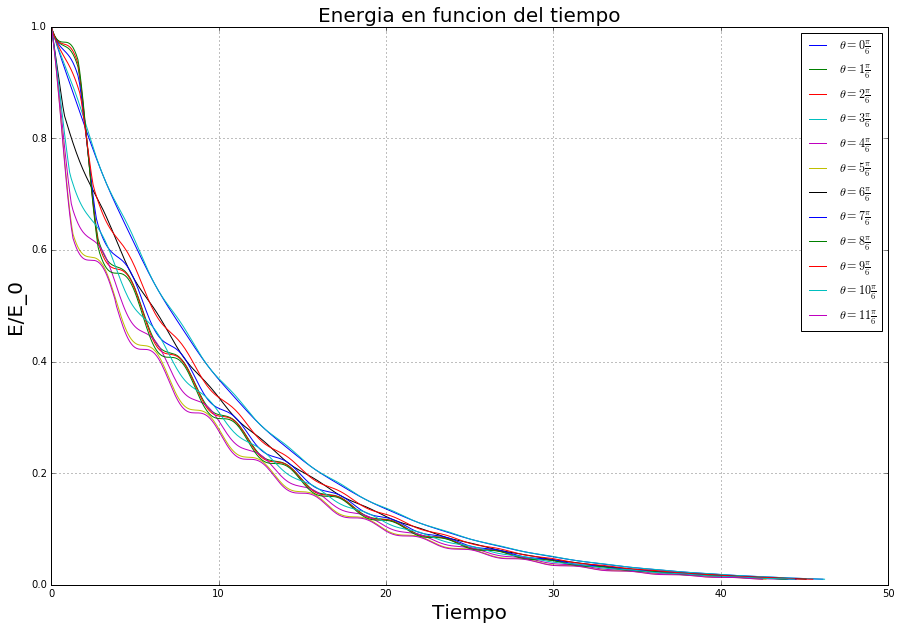

In [6]:
#Energia para distintas condiciones iniciales (deteniendo cuando sea menor
#a 1% de valor inic.
fig=figure(figsize=(15,10))
ax = fig.add_subplot(111)
grid(True)
ax.set_title(r'Energia en funcion del tiempo',fontsize=20),xlabel('Tiempo',fontsize=20),ylabel('E/E_0',fontsize=20)
N=100
theta = [n*pi/6. for n in range(12)]

for i in range(len(theta)):
    inicio = [0, 1 ,cos(i), sin(i)]
    t,sol = rk4(mov_c, inicio, [0,N])
    E=0.5*(inicio[2]**2+inicio[3]**2+inicio[0]**2+inicio[1]**2) 
    E_f=0.01*E
    a=0
    while E>=E_f:
        a+=1
        t, sol = rk4(mov_c, inicio, [0, a*0.1])
        E_1 = 0.5*(sol[:,2]**2+sol[:,3]**2+sol[:,0]**2+sol[:,1]**2) 
        E = E_1[-1]
    ax.plot(t,E_1,label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
ax.legend()
show()

In [7]:
#Momento angular en funcion del tiempo
def L_z(x_p):
    x,y,px,py = x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    L = x*py - y*px
    return L

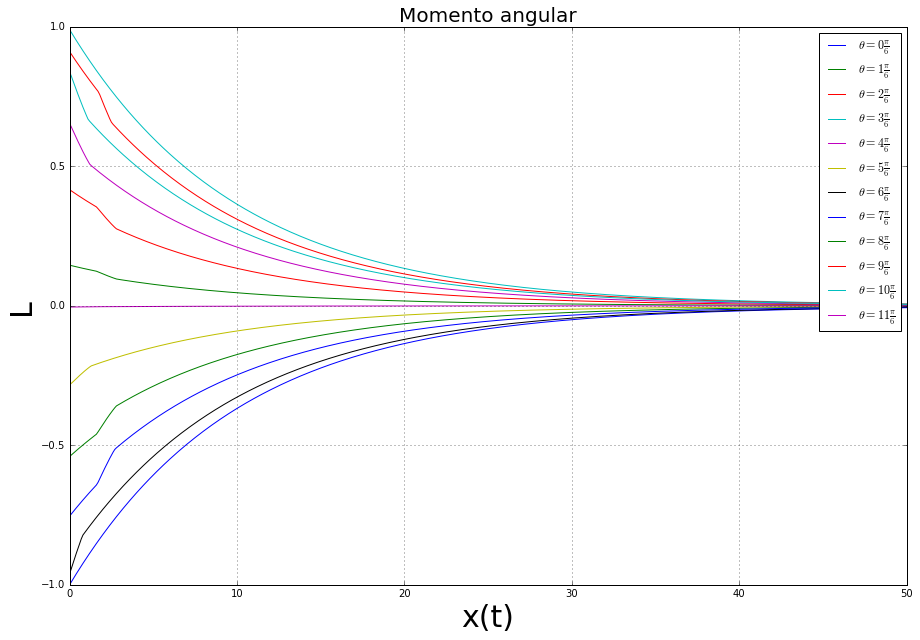

In [8]:
#Graficamos el momento
fig, ax = plt.subplots(figsize=(15, 10))
N=50
grid(True)
title(u"Momento angular",fontsize = 20),xlabel('x(t)',fontsize=30),ylabel('L',fontsize = 30)
theta = [n*pi/6. for n in range(12)]
for i in range(len(theta)):
    cond_ini = [0,1,cos(i),sin(i)]
    tc, solc = rk4(mov_c, cond_ini, [0,N])
    L = L_z(solc)
    plot(tc, L, label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
ax.legend()
show()

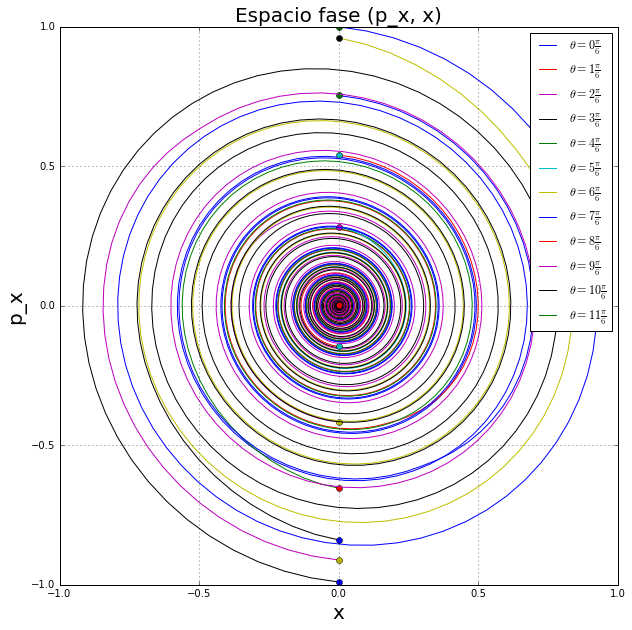

In [9]:
#Espacio fase en p_x,x
fig, ax = plt.subplots(figsize=(10, 10))
# theta = arange(0,12,1)*pi/6
N = 100
grid(True)
title(r'Espacio fase (p_x, x)',fontsize = 20),xlabel('x',fontsize=20),ylabel('p_x',fontsize = 20)
theta = [n*pi/6. for n in range(12)]
for i in range(len(theta)):
    inicio = [0,1,cos(i),sin(i)]
    tc, solc = rk4(mov_c, inicio, [0,N])
    plot(solc[:,0], solc[:,2], label="$ \\theta = "+str(i)+"\\frac{\pi}{6} $")
    plot(0,cos(i),'o')
ax.legend()
show()

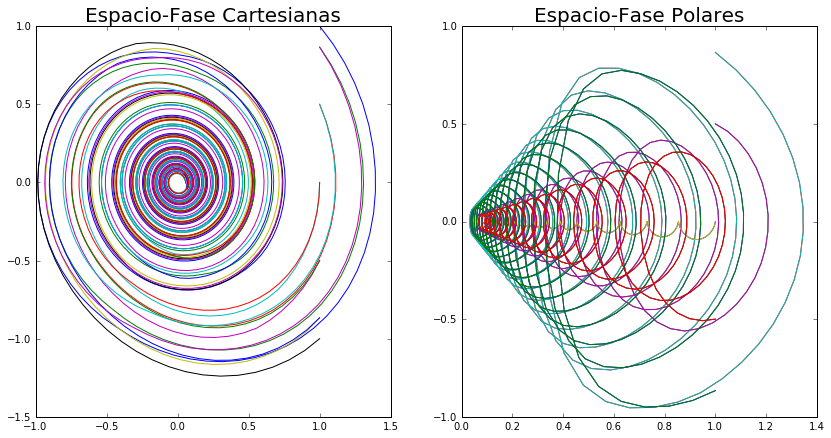

In [10]:
fig=figure(figsize=(14,7))
ax = fig.add_subplot(121)
bx = fig.add_subplot(122)
N=50

for n in range(12):
    x=1
    dx=2
    rc=[x,dx,cos((n*pi)/6),sin((n*pi)/6)]   
    tc,solc=rk4(mov_c,rc,[0,N])
    ax.plot(solc[:,0],solc[:,2])
    if n==3: # Tenemos discontinuidad, se quitan esos puntos
        n=3
    elif n==9:
        n=9  
    else:
        rp=[x,dx,sin((n*pi)/6),-cos((n*pi)/6)]
        tp,solp=rk4(mov_p,rp,[0,N])
        bx.plot(solp[:,0],solp[:,2])
ax.set_title('Espacio-Fase Cartesianas',fontsize=20)
bx.set_title('Espacio-Fase Polares',fontsize=20)
show()

### Ejercicio 2

Suponga que se tiene el sistema como en el problema anterior, pero ahora la partícula tiene carga $q > 0$ y en el origen también se encuentra una partícula de carga $q > 0$.

$(a)$ Sin considerar la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).

$(b)$ Considerando friccion, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).

In [25]:
#Ecuacion de Movimiento de particula con carga q>0, m=1
#Da la opcion de usar o no un modelo de friccion
def e_mov(pos, t, friccion=0, k=1, q=1, q_o=1):
    x, y, dx, dy = pos[0], pos[1], pos[2], pos[3]
    if friccion == 0:
        ddx,ddy = -k*pos[0] + q_o*q*pos[0]/((pos[0]**2+pos[1]**2)**1.5),-k*pos[1] + q_o*q*pos[1]/((pos[0]**2+pos[1]**2)**1.5)
    else:    
        ddx = -k*pos[0] + q_o*q*pos[0]/((pos[0]**2+pos[1]**2))**1.5 - friccion([dx,dy])[0]
        ddy = -k*pos[1] + q_o*q*pos[1]/((pos[0]**2+pos[1]**2))**1.5 - friccion([dx,dy])[1]
    return array([dx,dy,ddx,ddy])

In [12]:
#Friccion considerada en ejercicio 1
def fric_v(v,gamma=0.1,mu=0.2):
    norm_v = sqrt(v[0]**2 + v[1]**2)
    if norm_v < 1:
        f_x = gamma*v[0]
        f_y = gamma*v[1]
    else:    
        f_x = mu*(norm_v**(1.5))*v[0]
        f_y = mu*(norm_v**(1.5))*v[1]
    return array([f_x,f_y]) 

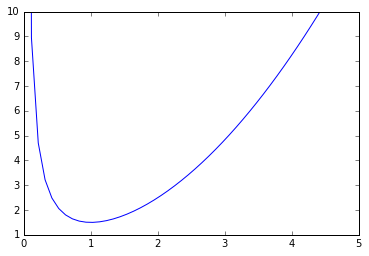

In [13]:
#Energia potencial del sistema con minimo en (.5,1.5)
def potencial(x):
    E = .5*(x**2)+1/x
    return E
x=linspace(.01,5)
plot(x,potencial(x))
ylim(1,10)
show()

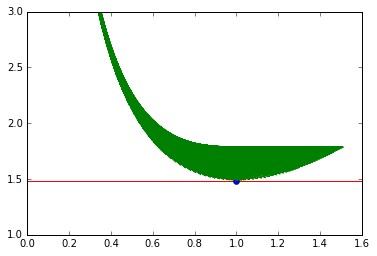

In [14]:
#Energia total del sistema
p = [0,1.5,.1,0] # se hace una simulacion con condiciones iniciales ro = (0,1.5) que es donde se encuentra un minimo
t,sol_id=rk4(e_mov,p,[0,400]) #de energia potencial, y con vo = (.1,0) poca velocidad en direccion x (muy poca energia cinetica)
norm_v_id = (sol_id[:,2]**2 + sol_id[:,3]**2)
norm_r_id = (sol_id[:,0]**2 + sol_id[:,1]**2)
E_id = .5*((abs(sol_id[:,0]))**2 + (abs(sol_id[:,2]))**2) + 1/(abs(sol_id[:,0])+.01)
ylim(1,3)
plt.axhline(1.48,color='red')
plot(1,1.48,'o')
plot(abs(sol_id[:,0])+.01,E_id)
show()
#Punto |r|=1 es de minima energia

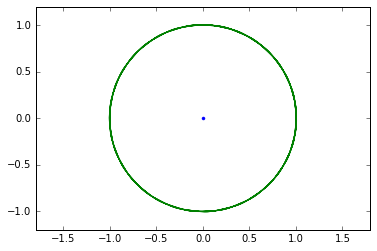

In [15]:
#Orbita cerrada circular del sistema
p = [0,1,.1,0] # bajo las condiciones |ro| = |(0,1)| = 1 y con vo = (.1,0)  poca velocidad en direccion x 
t,sol_id=rk4(e_mov,p,[0,400])
xlim(-1.8,1.8)
ylim(-1.2,1.2)
plot(0,0,'.',sol_id[:,0],sol_id[:,1])
show()
#Conclusion: si existen orbitas cerradas para los puntos minimos de energia

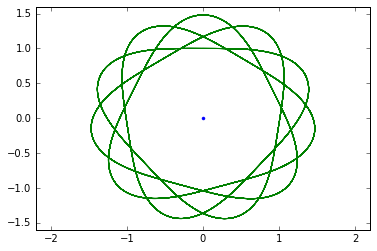

In [16]:
p = [0,1,1,0] # bajo las condiciones |ro| = |(0,1)| = 1 y con vo = (1,0)  
t,sol_id=rk4(e_mov,p,[0,400])
xlim(-2.2,2.2)
ylim(-1.6,1.6)
plot(0,0,'.',sol_id[:,0],sol_id[:,1])
show()

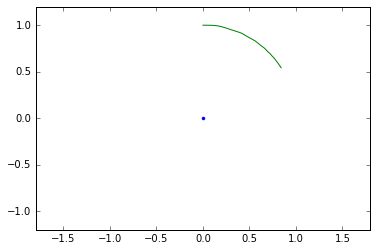

In [26]:
#Simulamos orbita con friccion. Para tener una orbita necesitamos velocidad
#constante de traslacion, y como tenemos friccion, esta velocidad tiende
#a cero. La orbita cerrada por lo tanto no puede existir por la perdida
#de energia cinetica
p = [0,1,.1,0]
t,sol_fv=rk4(e_mov,p,[0,600],fric_v)
xlim(-1.8,1.8)
ylim(-1.2,1.2)
plot(0,0,'.',sol_fv[:,0],sol_fv[:,1])
show()

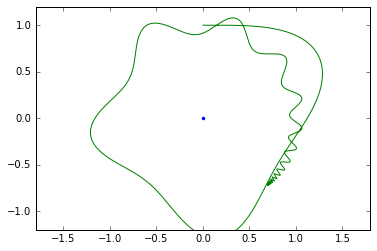

In [18]:
p = [0,1,1,0]
t,sol_fv=rk4(e_mov,p,[0,600],fric_v)
xlim(-1.8,1.8)
ylim(-1.2,1.2)
plot(0,0,'.',sol_fv[:,0],sol_fv[:,1])
show()

### Ejercicio 3 (falta agregar incisos nuevos)

Se tiene una partícula de masa $m = 1$ en un campo gravitacional$\vec{g} = −9.8\hat{j}$ en una caja como se con $L=10m$ y $d=3m$. Realice los ejercicios con valores de $\alpha=\frac{\pi}{6}$ y $\alpha=\frac{\pi}{10}$.

$(a)$ Realice una simulación con condición inicial tal que la posición inicial es sobre la rampa a un
tercio de la distancia de la pared vertical izquierda y el vértice inferior de la caja, y se dispara
con velocidad $|\vec{v}| = 1$ hacia la derecha con ángulos sobre la horizontal $\alpha$, $2\alpha$ y $3\alpha$. (Para que la simulación sea válida, la partícula debe rebotar al menos 20 con alguna parte de la caja).

$(b)$ Introduzca algún modelo de fricción y compare las trayectorias con el inciso anterior.

$(c)$ Realice los ejercicios en los incisos $(3a)$ y $(3b)$ pero ahora $|\vec{v}|=25$ y $|\vec{v}|=60$. Describa las similitudes y diferencias entre las distintas simulaciones.

$(d)$ Dibuje el espacio fase $p_x$,$x$ y $p_y$,$y$ cuando no hay fricción y la partícula es lanzada hacia la derecha a un ángulo $\alpha$ y vertical hacia arriba. Tome en cuenta el nuúmero necesario de rebotes para que la simulación pueda barrer el espacio fase de manera representativa.

### Ejercicio 4

Se tiene una partícula de masa $m = 1$ en una caja circular. Los radios de $a$ y $b$ son tales que $b = 2a$.

$(a)$ Realice una simulación en donde la partícula realiza varios rebotes en las paredes de la caja.
Suponga condiciones iniciales arbitrarias que le permitan hacer lo anterior.

$(b)$ ¿Existen condiciones iniciales que hagan que la partícula quede encasillada en sólo un sector de la caja?. De ser así muestre cuales son tales condiciones o demuestre porque no se pueden obtener dicha situación.

$(c)$ Si ahora se tiene un campo gravitacional uniforme $\vec{g} = 10\hat{n}$. Que condiciones iniciales se tendrían que cumplir para que la partícula sólo pueda ocupar la mitad de la dona.

Punto extra: 
Realice una animación para alguna trayectoria del problema en el inciso $(3c)$ y otra animación para el inciso $(4c)$.

In [19]:
def mov_part(pos,t,g=0,m=1):
    dx=pos[2]
    dy=pos[3]
    dvx,dvy=0,-g # la fuerza gravitacional es en direccion perpendicular y sentido negativo
    return array([dx,dy,dvx,dvy])

In [20]:
#Se define los rebotes a realizar de la partícula de la circunferencicia de radio b
def rebote_r_b(pos_i,mi_dt,b): #pos_i es trayectori[i,:]
    dt_busqueda=(mi_dt)/2
    y_izq=pos_i #obtenido de la trayectoria inicial
    t,sol=rk4(mov_part,pos_i,[0,dt_busqueda])
    y_med=sol[-1,:] #resultado de haber integrado a la mitad, ultimo punto se queda
    r_1=sqrt((y_izq[0])**2+(y_izq[1])**2)
    while r_1>b: #vector posicion de la particula esta fuera de la circunferencia 
        reinicio=y_med
        dt_busqueda=dt_busqueda/2
        t,sol=rk4(mov_part,reinicio,[0,dt_busqueda])
        y_izq=reinicio
        y_med=sol[-1,:]
        r_1=sqrt((y_izq[0])**2+(y_izq[1])**2)
    vec_per=-y_izq[0],-y_izq[1] #vector perpendicular a la circunferencia exterior
    alpha=arccos((-vec_per[0]*y_izq[2]-vec_per[1]*y_izq[3])/(sqrt(y_izq[2]**2+y_izq[3]**2)*sqrt(vec_per[0]**2+vec_per[1]**2)))
    #Angulo entre el vector negativo de la velocidad  y el vector perpendicular a la superfice de rebote
    
    vec_tan=vec_per[1],-vec_per[0]  #vector tangencial a la circunferencia exterior 
    theta=arccos((-vec_tan[0]*y_izq[2]-vec_tan[1]*y_izq[3])/(sqrt(y_izq[2]**2+y_izq[3]**2)*sqrt(vec_tan[0]**2+vec_tan[1]**2)))
    #Angulo entre el vector  negativo de la velocidad  y el vector tangencial a la superfice de rebote   
    
    if theta>(pi/2): # Si el angulo auxiliar es mayor a 90° el vector revotara en un angulo negativo respecto al vector normal
        alpha=-alpha
    else:        
        alpha=alpha    
    rot_vel=-cos(2*alpha)*(y_izq[2])+sin(2*alpha)*(y_izq[3]) #rotacion de 2alpha aplicada al vector velocidad  
    rot_per=-sin(2*alpha)*(y_izq[2])-cos(2*alpha)*(y_izq[3]) # repecto al vector perpendicular a la circunferencia interior
    y_izq=array([y_izq[0],y_izq[1],rot_vel,rot_per])  
    return y_izq

In [21]:
#Se define los rebotes a realizar de la partícula de la circunferencicia de radio a
def rebote_r_a(pos_i,mi_dt,b): #pos_i es trayectori[i,:]
    dt_busqueda=(mi_dt)/2
    y_izq=pos_i #obtenido de la trayectoria inicial
    t,sol=rk4(mov_part,pos_i,[0,dt_busqueda])
    y_med=sol[-1,:] #resultado de haber integrado a la mitad, ultimo punto se queda
    r_1=sqrt((y_izq[0])**2 + (y_izq[1])**2)
    while r_1<a: #vector posicion de la particula esta dentro de la circunferencia 
        reinicio=y_med
        dt_busqueda=dt_busqueda/2
        t,sol=rk4(mov_part,reinicio,[0,dt_busqueda])
        y_izq=reinicio
        y_med=sol[-1,:]
        r_1=sqrt((y_izq[0])**2+(y_izq[1])**2)
    vec_per=-y_izq[0],-y_izq[1] #vector perpendicular a la circunferencia interior
    alpha=arccos((-vec_per[0]*y_izq[2]-vec_per[1]*y_izq[3])/(sqrt(y_izq[2]**2+y_izq[3]**2)*sqrt(vec_per[0]**2+vec_per[1]**2)))
    #Angulo entre el vector negativo de la velocidad  y el vector perpendicular a la superfice de rebote
    
    vec_tan=vec_per[1],-vec_per[0]  #vector tangencial a la circunferencia interior 
    theta=arccos((-vec_tan[0]*y_izq[2]-vec_tan[1]*y_izq[3])/(sqrt(y_izq[2]**2+y_izq[3]**2)*sqrt(vec_tan[0]**2+vec_tan[1]**2)))
    # Angulo entre el vector  negativo de la velocidad  y el vector tangencial a la superfice de rebote   
    
    if theta>(pi/2): # Si el angulo auxiliar es mayor a 90° el vector revotara en un angulo negativo respecto al vector normal
        alpha=-alpha
    else:        
        alpha=alpha    
    rot_vel=-cos(2*alpha)*(y_izq[2])+sin(2*alpha)*(y_izq[3]) #rotacion de 2alpha aplicada al vector velocidad  
    rot_per=-sin(2*alpha)*(y_izq[2])-cos(2*alpha)*(y_izq[3]) # repecto al vector perpendicular a la circunferencia interior
    y_izq=array([y_izq[0],y_izq[1],rot_vel,rot_per])   
    return y_izq

In [22]:
#Se define la caja circular de radios a y b, tales que b=2a
def caja_circ(x,y,vx,vy,N,g,a,b): # (x,y,vx,vy) posicion y velocidad inicial de la particula, N es numero de puntos a calcular dentro de la trayectoria
    rebotes=0 # contador de rebotes
    inicio=[x,y,vx,vy] # condiciones iniciales de la pelota 
    trayectoria=zeros((N,len(inicio)))
    mi_dt=0.01
    trayectoria[0,:]=array(inicio)
    for i in range(N-1):
        t,sol_dt=rk4(mov_part,trayectoria[i,:],[0,mi_dt],g) #Integrador rk4 encuentra la trayectoria
        r=sqrt((sol_dt[-1,:][1])**2+(sol_dt[-1,:][0])**2)
        if r>b: #posicion en y de la particula es mayor a la circunferencia de radio b, la particula rebota
            punto=rebote_r_b(trayectoria[i,:],mi_dt,b)
            trayectoria[i+1,:]=punto 
            rebotes +=1
        else:
            trayectoria[i+1,:]=sol_dt[-1,:]      
        if r<a: #posicion en y de la particula es menor a la circunferencia de radio a, la particula rebota
            punto=rebote_r_a(trayectoria[i,:],mi_dt,a)
            trayectoria[i+1,:]=punto 
            rebotes +=1 # se agrega un contador a rebotes por cada rebote
    print "Numero de rebotes =",rebotes
    return trayectoria[:,0],trayectoria[:,1],trayectoria[:,2],trayectoria[:,3]

Numero de rebotes = 161


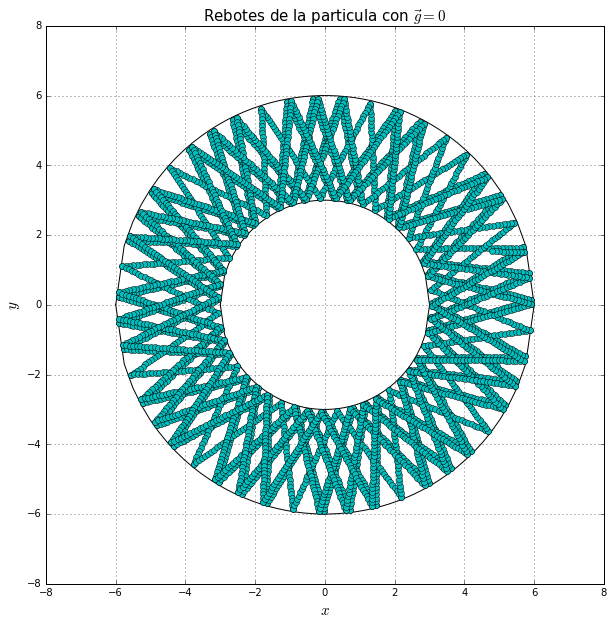

In [23]:
#Se grafican las trayectorias de los rebotes dados por la particula en caja circular
#de tal manera que la gravedad es nula
fig=figure(figsize=(10,10))
xlim([-8,8]),ylim([-8,8])
a=3 #radio de la circunferencia interior
b=2*a #radio de la circunferencia exterior
sol=caja_circ(1,3,-2,10,5000,0,a,b) #condiciones iniciales arbitrarias para caja circular
#Se grafica la caja circular
x,y,u,v=linspace(-b,b),linspace(-b,b),linspace(-a,a),linspace(-a,a)
plot(x,sqrt(-x**2+b**2),'black')
plot(y,-sqrt(-y**2+b**2),'black')
plot(u,sqrt(-u**2+a**2),'black')
plot(v,-sqrt(-v**2+a**2),'black')
plot(sol[0],sol[1],'-o',color='c') #grafica los puntos de la trayectoria 
xlabel('$x$',fontsize=15)
ylabel('$y$',fontsize=15)
grid(True)
title('Rebotes de la particula con $\\vec{g}=0$',fontsize=15)
show()

Numero de rebotes = 75


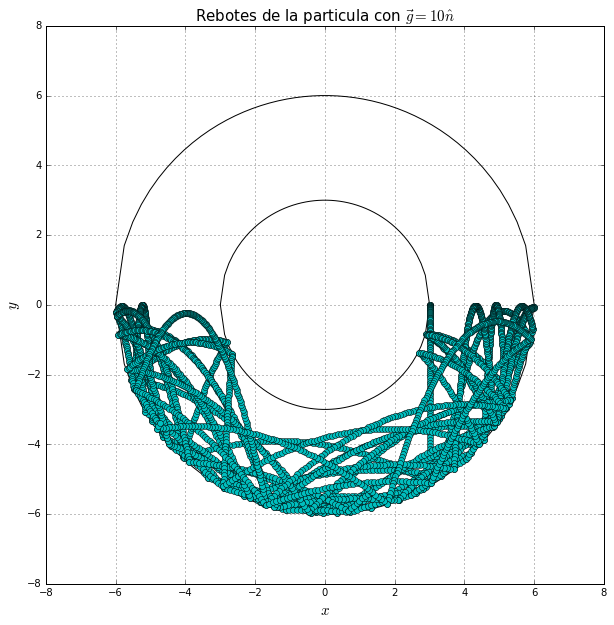

In [24]:
#Se grafican las trayectorias de los rebotes dados por la particula en caja circular
#de tal manera que la gravedad es nula
fig=figure(figsize=(10,10))
xlim([-8,8]),ylim([-8,8])
a=3 #radio de la circunferencia interior
b=2*a #radio de la circunferencia exterior
sol=caja_circ(3,0,0,0,5000,10,a,b) #condiciones iniciales arbitrarias para caja circular
#Se grafica la caja circular
x,y,u,v=linspace(-b,b),linspace(-b,b),linspace(-a,a),linspace(-a,a)
plot(x,sqrt(-x**2+b**2),'black')
plot(y,-sqrt(-y**2+b**2),'black')
plot(u,sqrt(-u**2+a**2),'black')
plot(v,-sqrt(-v**2+a**2),'black')
plot(sol[0],sol[1],'-o',color='c') #grafica los puntos de la trayectoria 
xlabel('$x$',fontsize=15)
ylabel('$y$',fontsize=15)
grid(True)
title('Rebotes de la particula con $\\vec{g}=10\\hat{n}$',fontsize=15)
show()